<a href="https://colab.research.google.com/github/shun0109/tmp/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Install seaborn if not already
!pip install seaborn --quiet

import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,SGDClassifier
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix,classification_report,mean_squared_error,precision_score, \
recall_score,f1_score,classification_report,precision_recall_curve, roc_auc_score, ConfusionMatrixDisplay
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
%matplotlib inline

In [ ]:
from pathlib import Path

IMAGES_PATH=Path() / 'images' / 'classification'
IMAGES_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
mnist=fetch_openml('mnist_784', as_frame=False)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y=mnist.data, mnist.target

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

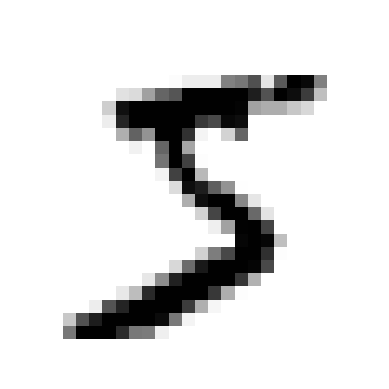

In [ ]:
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis('off')

example_digit=X[0]
plot_digit(example_digit)
plt.show()

In [ ]:
y[0]

'5'

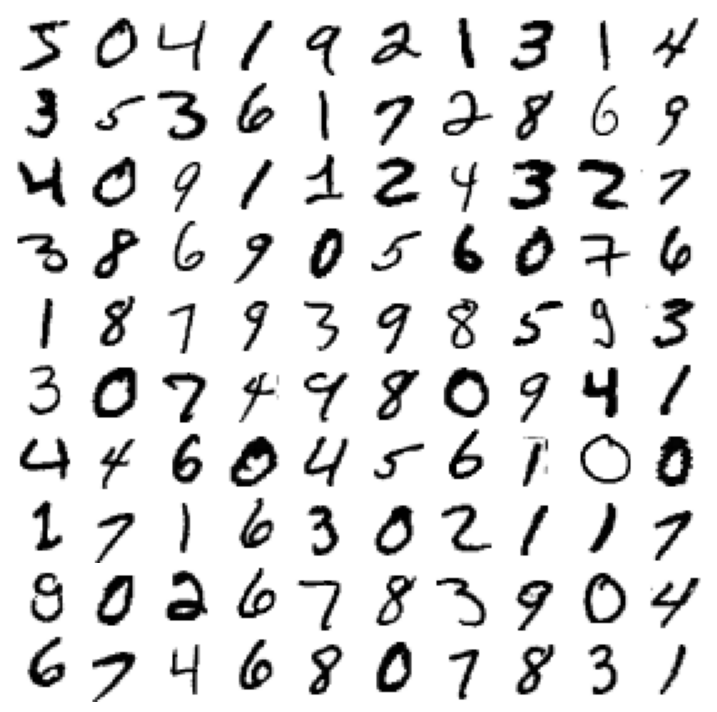

In [ ]:
plt.figure(figsize=(9,9))

for idx,image_data in enumerate(X[:100]):
  plt.subplot(10,10,idx+1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([example_digit])

array([ True])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
print(f"Classification Report\n {classification_report(y_train_5,y_train_pred)}")

Classification Report
               precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [ ]:
y_scores=sgd_clf.decision_function([example_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold=0
y_eg_digit_pred=(y_scores>threshold)

In [ ]:
y_eg_digit_pred

array([ True])

In [ ]:
threshold=3000
y_eg_digit_pred=(y_scores>threshold)
y_eg_digit_pred

array([False])

In [ ]:
y_scores=cross_val_predict(sgd_clf,
                           X_train,
                           y_train_5,
                           cv=3,
                           method='decision_function')

In [ ]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

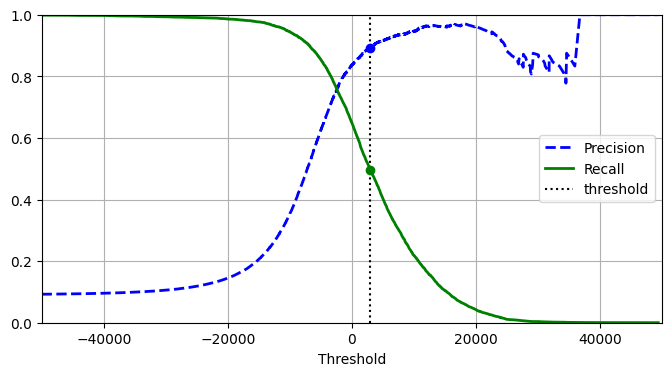

In [ ]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
# save_fig("precision_recall_vs_threshold_plot")

plt.show()

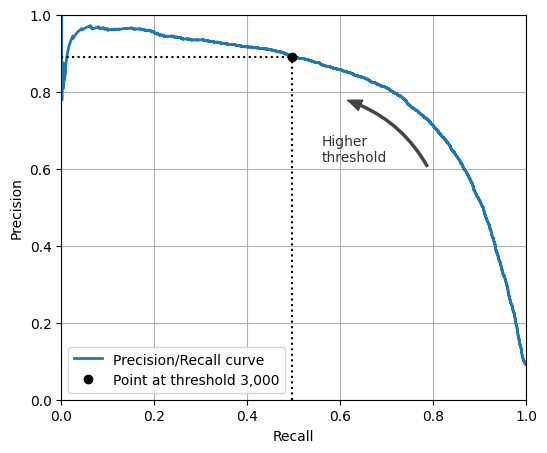

In [ ]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")

plt.show()

In [ ]:
idx_for_90_precision=(precisions>=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [ ]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision=recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [ ]:
fpr,tpr,threshold=roc_curve(y_train_5,y_scores)

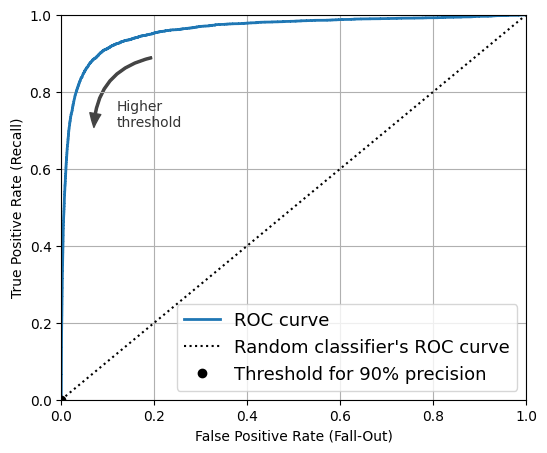

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
# save_fig("roc_curve_plot")

plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

In [50]:
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],
            y_train[:2000])

SVC(random_state=42)

In [51]:
svm_clf.predict([example_digit])

array(['5'], dtype=object)

In [52]:
example_digit_scores = svm_clf.decision_function([example_digit])
example_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [53]:
class_id=example_digit_scores.argmax()
class_id

np.int64(5)

In [54]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [55]:
svm_clf.decision_function_shape='ovo'
example_digit_scores_ovo=svm_clf.decision_function([example_digit])
example_digit_scores_ovo

array([[ 0.11314332, -0.21144362, -0.97226923,  0.50926537, -1.00524263,
         0.18971803,  0.08767314, -0.31096994, -0.03885061, -0.45175117,
        -1.28080687,  0.25210289, -1.00847383, -0.12725616, -0.31581733,
        -0.89588797, -0.36453921, -0.92588341,  0.78675875, -0.99974949,
         0.45303827,  0.2427903 , -0.23896814,  0.24660197,  1.54035119,
        -0.76999021,  1.10914098,  1.13399179,  1.04030548,  1.20260951,
        -1.42133177, -0.53302981, -0.45416354, -0.98961137, -0.95359226,
         1.21202449,  0.99995787,  1.00013239,  1.07935139, -0.0180567 ,
        -0.67167471, -0.14405376, -0.30458887, -0.13465288,  0.24683723]])

In [58]:
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [59]:
ovr_clf.predict([example_digit])

array(['5'], dtype='<U1')

In [60]:
len(ovr_clf.estimators_)

10

In [61]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([example_digit])

array(['3'], dtype='<U1')

In [62]:
sgd_clf.decision_function([example_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [63]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [66]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

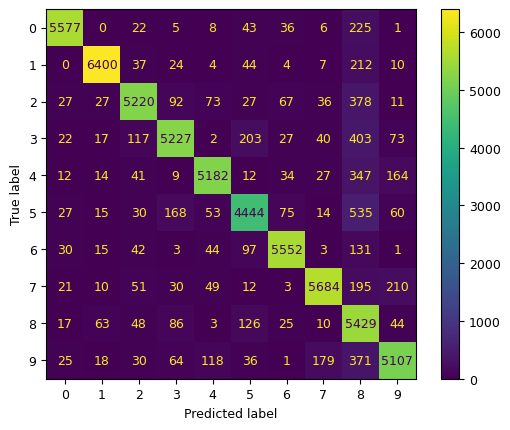

In [67]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

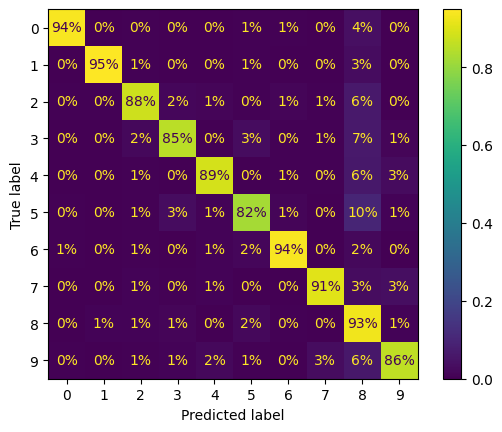

In [70]:
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        normalize='true',
                                        values_format='.0%')
plt.show()

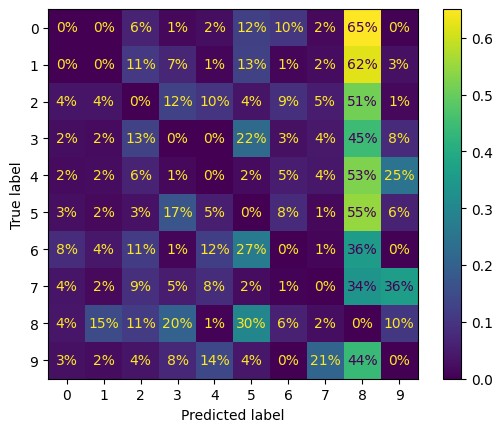

In [71]:
sample_weight=(y_train_pred!=y_train)
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        values_format='.0%')

In [72]:
cl_a,cl_b='3','5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

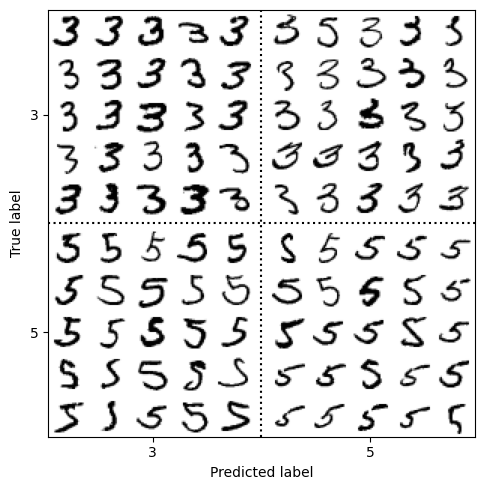

In [73]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

In [79]:
y_train_large=(y_train>='7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [81]:
knn_clf.predict([example_digit])

array([[False,  True]])

In [82]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [84]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [85]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [86]:
chain_clf.predict([example_digit])

array([[0., 1.]])

In [87]:
np.random.seed(42)
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

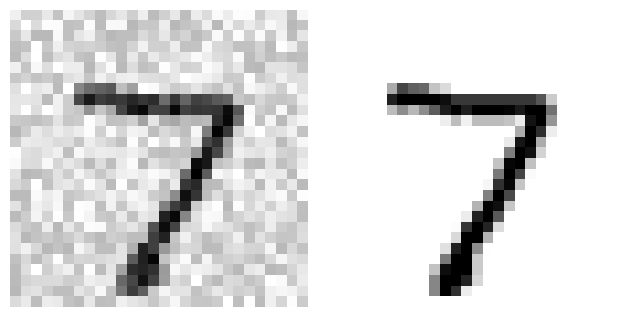

In [91]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig('noisy_digit_example_plot')
plt.show()